In [11]:
import pandas as pd
import numpy as np
import os
print os.getcwd()

/Users/efrainolivares/sandbox/url_filter_with_staffing


In [2]:
df_staff = pd.read_csv('staffing_content.tsv', delimiter='\t')
df_staff.head(10)

,url,end_url,binary,is_staffing_score
0,jazaatechnologies.com,http://www.jazaatechnologies.com/,1,0.999350
1,empowerindiahr.com,http://www.empowerindiahr.com/,1,0.999308
2,advantagepartnersinc.com,http://www.advantagepartnersinc.com/,1,0.999161
3,jcmalone.com,http://www.jcmalone.com/,1,0.999136
4,diagpartners.com,http://www.diagpartners.com/,1,0.999067
5,archermeridian.com,http://www.archermeridian.com/,1,0.999014
6,tekdoors.com,http://www.tekdoors.com/,1,0.999001
7,thebestirs.com,http://www.thebestirs.com/,1,0.998949
8,profinders.co.in,http://www.profinders.co.in/,1,0.998851
9,jhomaandassociates.com,http://www.jhomaandassociates.com/,1,0.998754


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x10c173b90>]], dtype=object)

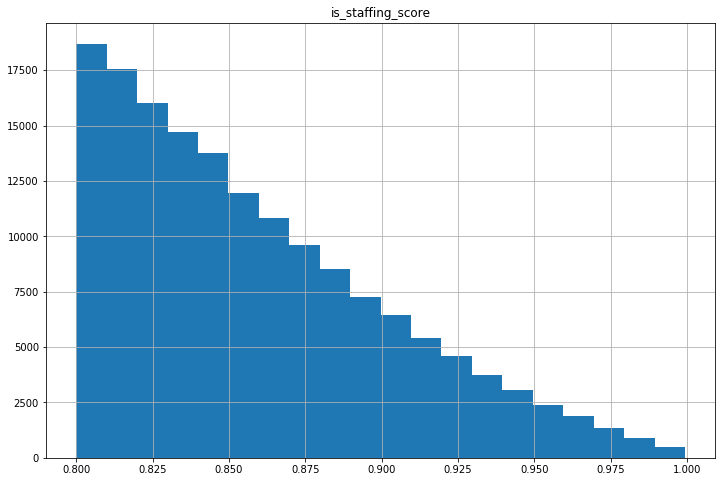

In [3]:
%matplotlib inline
df_staff.hist(column='is_staffing_score', figsize=(12,8), bins=20)

In [4]:
import sqlite3

In [5]:
conn = sqlite3.connect('sql3dbase/staff_db.db')
cursor = conn.cursor()

In [6]:
find_common_urls = "SELECT twomilrun.url, twomilrun.is_staffing_score FROM twomilrun WHERE TRIM(twomilrun.url) in (SELECT TRIM(full_list.url) from full_list);"
response = cursor.execute(find_common_urls)
for idx, row in enumerate(response.fetchall()):
    print idx, row[1], row[0]

0 0.999161035 advantagepartnersinc.com 
1 0.998015641 qtigroup.com 
2 0.997981336 24seventalent.com 
3 0.997838469 magnumhunt.com 
4 0.997568174 lassengroup.com 
5 0.996395426 amtemps.com 
6 0.996263091 envision.com 
7 0.99620941 jonusgroup.com 
8 0.995631171 ignitu.com 
9 0.995414174 eblinger.com 
10 0.995160018 kingstonstanley.com 
11 0.99514055 headfield.com 
12 0.995130577 corporateladder.in 
13 0.994975784 neerinfo.com 
14 0.994173008 equinoxes.in 
15 0.993975457 opensourcetechnical.com 
16 0.993417873 theashgroup.com 
17 0.993180375 sciente.com 
18 0.993164755 sinongroup.com 
19 0.993155521 juliacortrecruiting.com 
20 0.992544408 3bridgesolutions.com 
21 0.992354028 crplindia.com 
22 0.992196613 doekerresource.com 
23 0.992114283 kineticom.com 
24 0.991599547 fstonetechnologies.com 
25 0.991574166 archirings.com 
26 0.991086721 academicappointments.co.uk 
27 0.990989596 newcastleassoc.com 
28 0.990845376 skilledpeople.com 
29 0.990404031 ntrinsic.net 
30 0.990360325 urecruit.org 

In [7]:
count_all_suppressed = "SELECT COUNT(*) from full_list;"
response = cursor.execute(count_all_suppressed)
print "ALL SUPPRESSED:", [item for item in response.fetchall()]

ALL SUPPRESSED: [(63200,)]


In [8]:
count_all_suppressed_for_staffing = "SELECT COUNT(*) FROM full_list WHERE reason LIKE 'staffing';"
response = cursor.execute(count_all_suppressed_for_staffing)
print "ALL SUPP> STAFFING:", [item for item in response.fetchall()]

ALL SUPP> STAFFING: [(21893,)]


In [9]:
print "OVERLAP BETWEEN 2mil and known all suppressed: 1212"

OVERLAP BETWEEN 2mil and known all suppressed: 1212


In [10]:
twomilrun_count = "SELECT COUNT(*) FROM twomilrun;"
response = cursor.execute(twomilrun_count)
print "TWO MILLION RUN FOUND STAFFING:", [item for item in response.fetchall()]

TWO MILLION RUN FOUND STAFFING: [(159250,)]
